In [1]:
!pip install keras-tcn
!pip install -U finance-datareader

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

/home/work/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2023-02-03 07:26:47.407734: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 07:26:47.655647: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-03 07:26:51.288060: W tensorflow/compiler/xla/stream_executor/platform/default/

In [3]:
kospi_train = fdr.DataReader('KS11', '1990-01-01','2017-12-31')
kospi_train['Change1'] = kospi_train['Close']/kospi_train['Close'].shift(1) - 1
kospi_train['Change7'] = kospi_train['Close']/kospi_train['Close'].shift(7) - 1
kospi_train['Change15'] = kospi_train['Close']/kospi_train['Close'].shift(15) - 1
kospi_train['Change30'] = kospi_train['Close']/kospi_train['Close'].shift(30) - 1
print(kospi_train.head())
print(kospi_train.columns)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1996-12-11  705.989990  709.479980  704.429993  704.679993  704.679993   
1996-12-12  705.109985  706.010010  688.739990  689.380005  689.380005   
1996-12-13  690.440002  695.719971  677.640015  689.070007  689.070007   
1996-12-16  686.969971  686.969971  667.710022  673.919983  673.919983   
1996-12-17  675.349976  680.090027  660.390015  663.349976  663.349976   

             Volume   Change1  Change7  Change15  Change30  
Date                                                        
1996-12-11  28000.0       NaN      NaN       NaN       NaN  
1996-12-12  25900.0 -0.021712      NaN       NaN       NaN  
1996-12-13  26500.0 -0.000450      NaN       NaN       NaN  
1996-12-16  22800.0 -0.021986      NaN       NaN       NaN  
1996-12-17  31600.0 -0.015684      NaN       NaN       NaN  
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'V

In [4]:
kospi_train = kospi_train.dropna()
print(kospi_train.head())
print(kospi_train.columns)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-01-24  669.030029  679.559998  658.179993  679.559998  679.559998   
1997-01-27  684.309998  685.460022  664.679993  664.700012  664.700012   
1997-01-28  661.659973  677.630005  653.419983  662.849976  662.849976   
1997-01-29  663.330017  672.900024  654.950012  663.559998  663.559998   
1997-01-30  663.650024  679.039978  662.270020  676.520020  676.520020   

             Volume   Change1   Change7  Change15  Change30  
Date                                                         
1997-01-24  35500.0  0.003915 -0.028867  0.039416 -0.013801  
1997-01-27  28300.0 -0.021867 -0.066249  0.060347 -0.013681  
1997-01-28  30400.0 -0.002783 -0.054665  0.084772 -0.000754  
1997-01-29  30200.0  0.001071 -0.076413  0.067830  0.003281  
1997-01-30  28800.0  0.019531 -0.020303  0.057277 -0.020913  
Index(['Open', 'High', 'Low', 'Close', 'Adj Clo

<AxesSubplot:xlabel='Change30'>

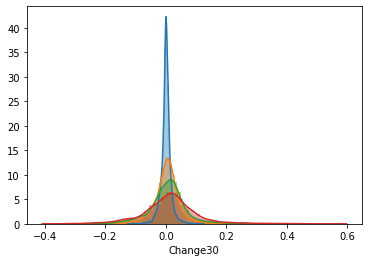

In [5]:
sns.distplot(kospi_train['Change1'])
sns.distplot(kospi_train['Change7'])
sns.distplot(kospi_train['Change15'])
sns.distplot(kospi_train['Change30'])

In [6]:
kospi_train_close = kospi_train['Close']
kospi_train_c1 = kospi_train['Change1']
kospi_train_c7 = kospi_train['Change7']
kospi_train_c15 = kospi_train['Change15']
kospi_train_c30 = kospi_train['Change30']
print(kospi_train_close, kospi_train_c1)

Date
1997-01-24     679.559998
1997-01-27     664.700012
1997-01-28     662.849976
1997-01-29     663.559998
1997-01-30     676.520020
                 ...     
2017-12-21    2429.830078
2017-12-22    2440.540039
2017-12-26    2427.340088
2017-12-27    2436.669922
2017-12-28    2467.489990
Name: Close, Length: 4668, dtype: float64 Date
1997-01-24    0.003915
1997-01-27   -0.021867
1997-01-28   -0.002783
1997-01-29    0.001071
1997-01-30    0.019531
                ...   
2017-12-21   -0.019649
2017-12-22    0.004408
2017-12-26   -0.005409
2017-12-27    0.003844
2017-12-28    0.012648
Name: Change1, Length: 4668, dtype: float64


In [7]:
kospi_test = fdr.DataReader('KS11', '2018-01-01')
kospi_test['Change1'] = kospi_test['Close']/kospi_test['Close'].shift(1) - 1
kospi_test['Change7'] = kospi_test['Close']/kospi_test['Close'].shift(7) - 1
kospi_test['Change15'] = kospi_test['Close']/kospi_test['Close'].shift(15) - 1
kospi_test['Change30'] = kospi_test['Close']/kospi_test['Close'].shift(30) - 1
print(kospi_test.head())
print(kospi_test.columns)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02  2474.860107  2481.020020  2465.939941  2479.649902  2479.649902   
2018-01-03  2484.629883  2493.399902  2481.909912  2486.350098  2486.350098   
2018-01-04  2502.500000  2502.500000  2466.449951  2466.459961  2466.459961   
2018-01-05  2476.850098  2497.520020  2475.510010  2497.520020  2497.520020   
2018-01-08  2510.699951  2515.370117  2494.179932  2513.280029  2513.280029   

            Volume   Change1  Change7  Change15  Change30  
Date                                                       
2018-01-02  262200       NaN      NaN       NaN       NaN  
2018-01-03  331100  0.002702      NaN       NaN       NaN  
2018-01-04  333800 -0.008000      NaN       NaN       NaN  
2018-01-05  308800  0.012593      NaN       NaN       NaN  
2018-01-08  311400  0.006310      NaN       NaN       NaN  
Index(['Open', 'High', 'Lo

In [8]:
kospi_test = kospi_test.dropna()
print(kospi_test.head())
print(kospi_test.columns)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-02-13  2402.889893  2421.800049  2388.540039  2395.189941  2395.189941   
2018-02-14  2412.469971  2426.629883  2408.020020  2421.830078  2421.830078   
2018-02-19  2452.520020  2455.120117  2428.149902  2442.820068  2442.820068   
2018-02-20  2433.350098  2438.479980  2411.229980  2415.120117  2415.120117   
2018-02-21  2417.729980  2432.449951  2404.020020  2429.649902  2429.649902   

            Volume   Change1   Change7  Change15  Change30  
Date                                                        
2018-02-13  423400  0.004113 -0.051556 -0.055748 -0.034061  
2018-02-14  305700  0.011122 -0.028061 -0.045772 -0.025950  
2018-02-19  322100  0.008667 -0.004276 -0.046604 -0.009585  
2018-02-20  421500 -0.011339  0.007744 -0.062002 -0.032993  
2018-02-21  432300  0.006016  0.009150 -0.064868 -0.033275  
Index(['Open', 'Hig

In [9]:
kospi_test_close = kospi_test['Close']
kospi_test_c1 = kospi_test['Change1']
kospi_test_c7 = kospi_test['Change7']
kospi_test_c15 = kospi_test['Change15']
kospi_test_c30 = kospi_test['Change30']
print(kospi_test_close, kospi_test_c1)

Date
2018-02-13    2395.189941
2018-02-14    2421.830078
2018-02-19    2442.820068
2018-02-20    2415.120117
2018-02-21    2429.649902
                 ...     
2023-01-30    2450.469971
2023-01-31    2425.080078
2023-02-01    2449.800049
2023-02-02    2468.879883
2023-02-03    2480.399902
Name: Close, Length: 1223, dtype: float64 Date
2018-02-13    0.004113
2018-02-14    0.011122
2018-02-19    0.008667
2018-02-20   -0.011339
2018-02-21    0.006016
                ...   
2023-01-30   -0.013506
2023-01-31   -0.010361
2023-02-01    0.010193
2023-02-02    0.007788
2023-02-03    0.004666
Name: Change1, Length: 1223, dtype: float64


In [10]:
kospi_train_close = kospi_train_close.values
kospi_train_c1 = 100 * kospi_train_c1.values
kospi_train_c7 = 100 * kospi_train_c7.values
kospi_train_c15 = 100 * kospi_train_c15.values
kospi_train_c30 = 100 * kospi_train_c30.values

kospi_test_close = kospi_test_close.values
kospi_test_c1 = 100 * kospi_test_c1.values
kospi_test_c7 = 100 * kospi_test_c7.values
kospi_test_c15 = 100 * kospi_test_c15.values
kospi_test_c30 = 100 * kospi_test_c30.values
print(kospi_test_c1)

[0.41125768 1.11223484 0.86669953 ... 1.01934659 0.7788323  0.46660913]


In [31]:
lookback_window = 60
x_train_1, y_train_1 = [], []
x_train_7, y_train_7 = [], []
x_train_15, y_train_15 = [], []
x_train_30, y_train_30 = [], []

In [32]:
for i in range(lookback_window, len(kospi_train_close)-1):
    x_train_1.append(kospi_train_close[i - lookback_window:i])
    y_train_1.append(kospi_train_c1[i])

for i in range(lookback_window, len(kospi_train_close)-6):
    x_train_7.append(kospi_train_close[i - lookback_window:i])
    y_train_7.append(kospi_train_c7[i+6])

for i in range(lookback_window, len(kospi_train_close)-14):
    x_train_15.append(kospi_train_close[i - lookback_window:i])
    y_train_15.append(kospi_train_c15[i+14])

for i in range(lookback_window, len(kospi_train_close)-29):
    x_train_30.append(kospi_train_close[i - lookback_window:i])
    y_train_30.append(kospi_train_c30[i+29])

In [33]:
for index in range(len(y_train_1)):
    if y_train_1[index]>= -0.01 and y_train_1[index] < 0.01:
        y_train_1[index] = 'neutral'
    elif y_train_1[index] >= 0.01:
        y_train_1[index] = 'increase'
    else:
        y_train_1[index] = 'decrease'
        
for index in range(len(y_train_7)):
    if y_train_7[index]>= -0.01 and y_train_7[index] < 0.01:
        y_train_7[index] = 'neutral'
    elif y_train_7[index] >= 0.01:
        y_train_7[index] = 'increase'
    else:
        y_train_7[index] = 'decrease'

for index in range(len(y_train_15)):
    if y_train_15[index]>= -0.01 and y_train_15[index] < 0.01:
        y_train_15[index] = 'neutral'
    elif y_train_15[index] >= 0.01:
        y_train_15[index] = 'increase'
    else:
        y_train_15[index] = 'decrease'

for index in range(len(y_train_30)):
    if y_train_30[index]>= -0.01 and y_train_30[index] < 0.01:
        y_train_30[index] = 'neutral'
    elif y_train_30[index] >= 0.01:
        y_train_30[index] = 'increase'
    else:
        y_train_30[index] = 'decrease'

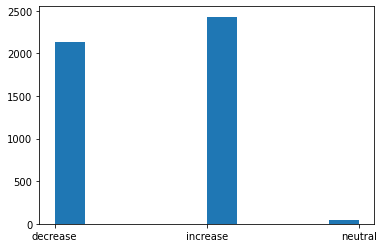

In [34]:
import matplotlib.pyplot as plt
plt.hist(y_train_1)
plt.show()

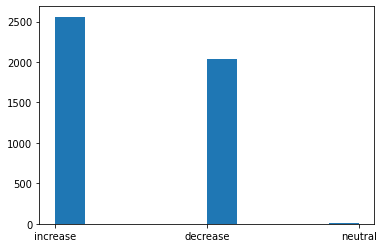

In [35]:
import matplotlib.pyplot as plt
plt.hist(y_train_7)
plt.show()

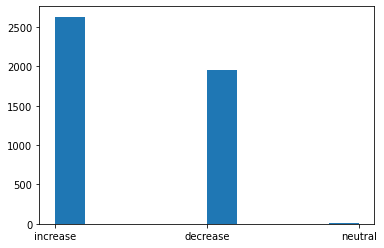

In [36]:
import matplotlib.pyplot as plt
plt.hist(y_train_15)
plt.show()

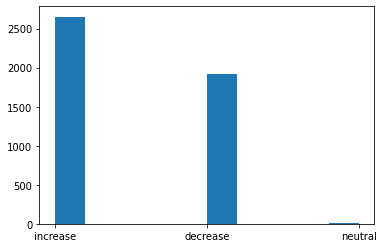

In [37]:
import matplotlib.pyplot as plt
plt.hist(y_train_30)
plt.show()

In [45]:
print(y_train_30.count('decrease'))

1922


In [46]:
x_test_1, y_test_1 = [], []
x_test_7, y_test_7 = [], []
x_test_15, y_test_15 = [], []
x_test_30, y_test_30 = [], []

In [47]:
for i in range(lookback_window, len(kospi_test_close)-1):
    x_test_1.append(kospi_test_close[i - lookback_window:i])
    y_test_1.append(kospi_test_c1[i])

for i in range(lookback_window, len(kospi_test_close)-6):
    x_test_7.append(kospi_test_close[i - lookback_window:i])
    y_test_7.append(kospi_test_c7[i+6])

for i in range(lookback_window, len(kospi_test_close)-14):
    x_test_15.append(kospi_test_close[i - lookback_window:i])
    y_test_15.append(kospi_test_c15[i+14])

for i in range(lookback_window, len(kospi_test_close)-29):
    x_test_30.append(kospi_test_close[i - lookback_window:i])
    y_test_30.append(kospi_test_c30[i+29])

In [48]:
for index in range(len(y_test_1)):
    if y_test_1[index]>= -0.01 and y_test_1[index] < 0.01:
        y_test_1[index] = 'neutral'
    elif y_test_1[index] >= 0.01:
        y_test_1[index] = 'increase'
    else:
        y_test_1[index] = 'decrease'
        
for index in range(len(y_test_7)):
    if y_test_7[index]>= -0.01 and y_test_7[index] < 0.01:
        y_test_7[index] = 'neutral'
    elif y_test_7[index] >= 0.01:
        y_test_7[index] = 'increase'
    else:
        y_test_7[index] = 'decrease'

for index in range(len(y_test_15)):
    if y_test_15[index]>= -0.01 and y_test_15[index] < 0.01:
        y_test_15[index] = 'neutral'
    elif y_test_15[index] >= 0.01:
        y_test_15[index] = 'increase'
    else:
        y_test_15[index] = 'decrease'

for index in range(len(y_test_30)):
    if y_test_30[index]>= -0.01 and y_test_30[index] < 0.01:
        y_test_30[index] = 'neutral'
    elif y_test_30[index] >= 0.01:
        y_test_30[index] = 'increase'
    else:
        y_test_30[index] = 'decrease'

In [54]:
print(y_test_30.count('neutral'))

4
